In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Preprocessing

### 1. Data Understanding

In [2]:
df = pd.read_csv("Houses.csv")
display(df.head(2))
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


(1460, 81)


In [3]:
df.drop(["Id"], axis=1, inplace=True)

### 2. Check for Dtypes

In [4]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [5]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,int64,int64,category,category,category,category,category,category,category,int64,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,int64,int64,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### 3. Null values

- **Check for Null Values**

In [6]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


- **Drop Null values**

In [7]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

- **Replace Null values**

-
    - Replace with Mode for categorical columns

In [8]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [9]:
df.fillna(modes, inplace=True)

-
    - Replace with Median for numerical columns(due to distribution skewness)

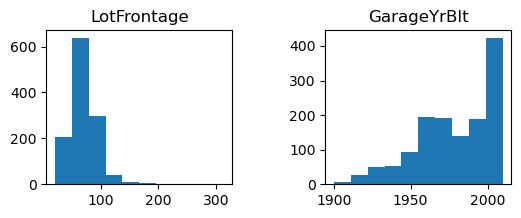

In [10]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [11]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': 69.0, 'GarageYrBlt': 1979.5}

In [12]:
df.fillna(medians, inplace=True)

- **Drop columns with high Null Ratio**

In [13]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

- **Check for Null Values after handing Null values**

In [14]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Handle Outliers

- **Numerical columns**

In [15]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

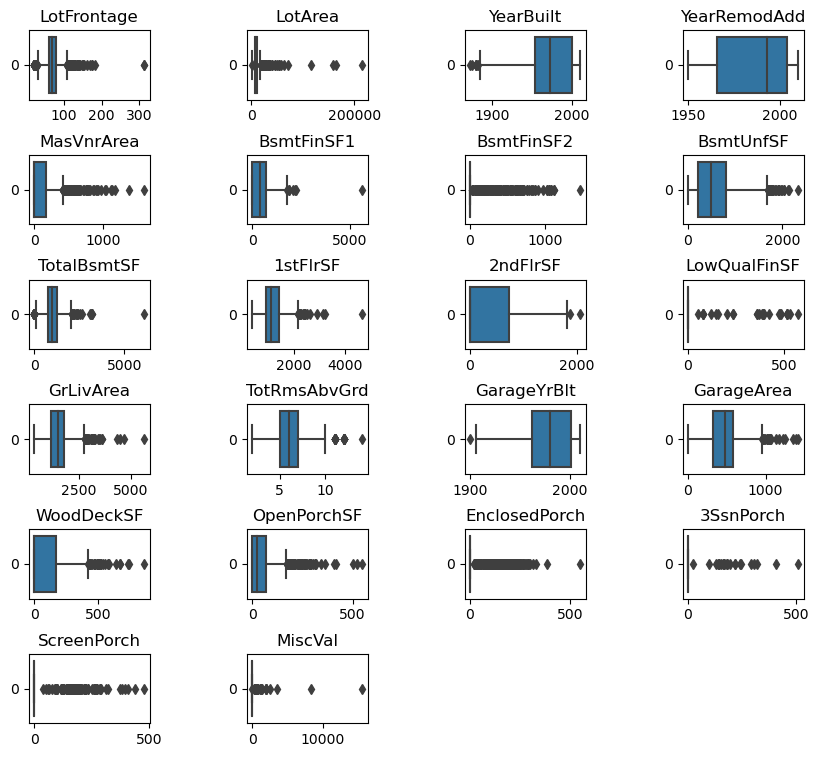

In [16]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [17]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

- **Categorical columns**
    - replace the outlier categories (which are categories that rarely occur) with the mode.

In [18]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

### 5. Visualization

In [19]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

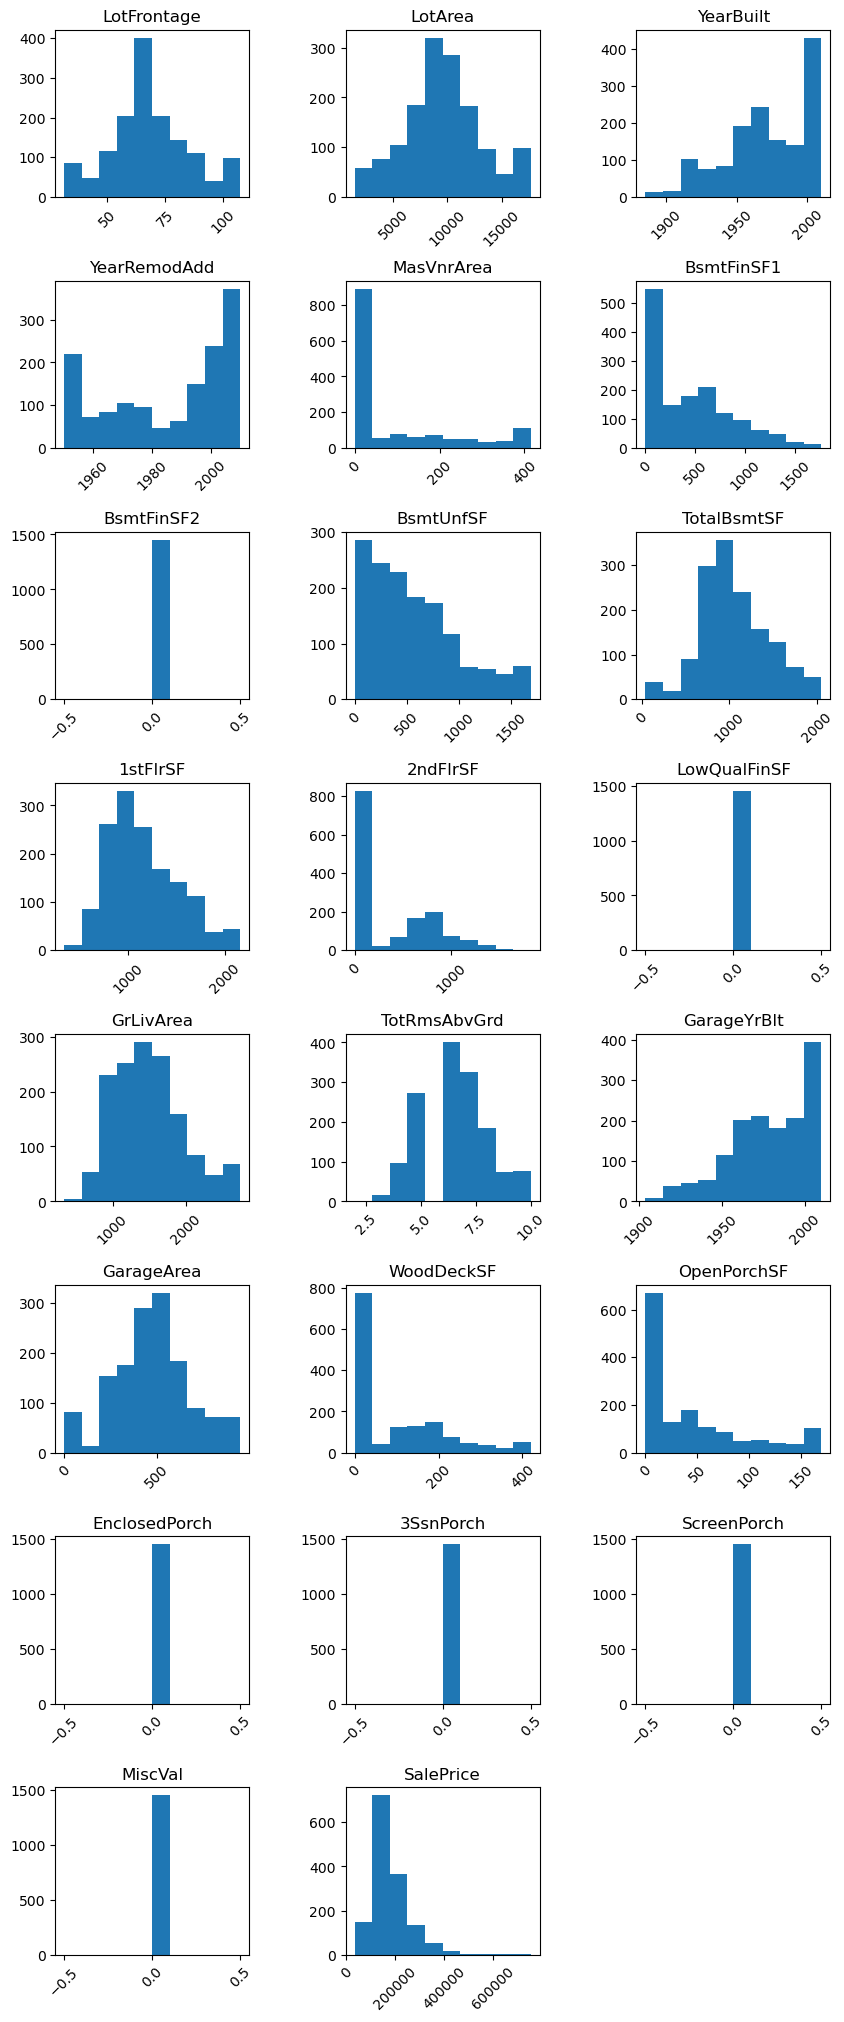

In [20]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [21]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

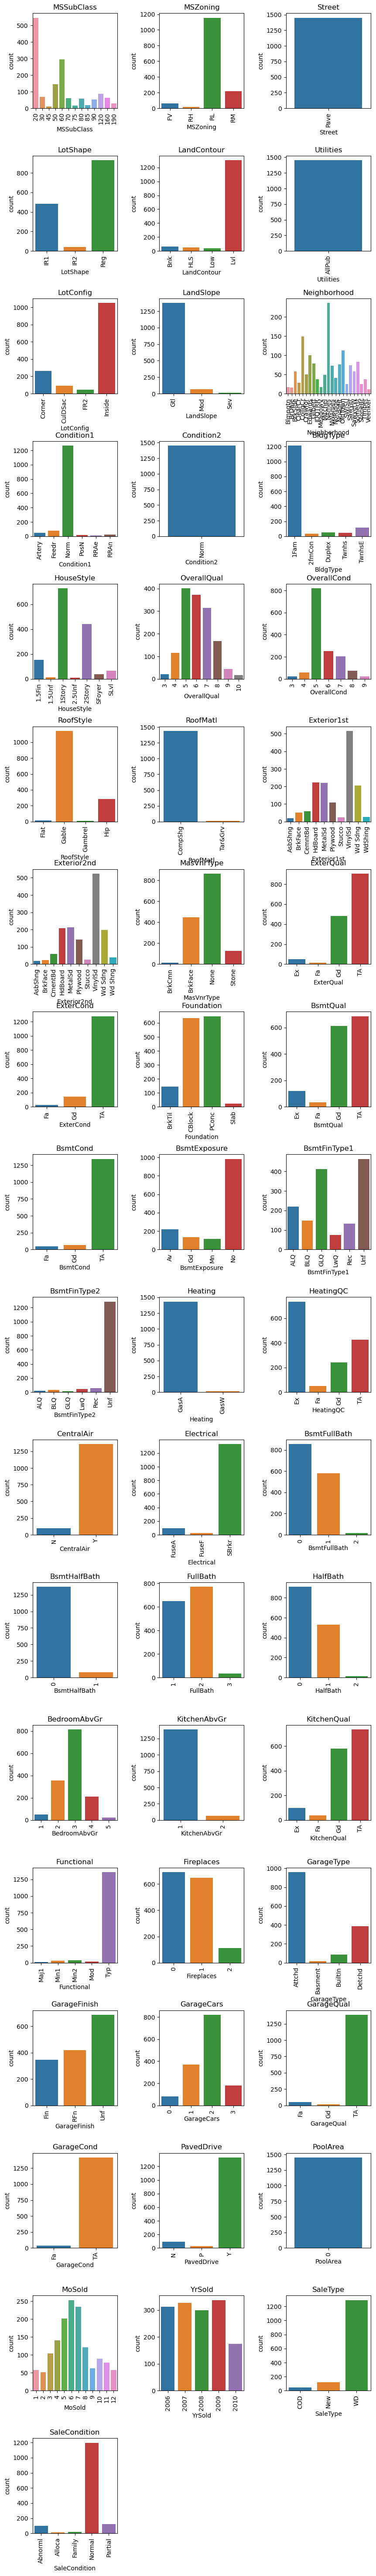

In [22]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [23]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

**Drop columns with low variance**

In [24]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

### 6. Remove Duplicates

In [25]:
df.duplicated().sum()

0

### 7. Data Splitting

In [26]:
X, y = df.iloc[:, :-1], df.iloc[:, -1:]

### 8. Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

### 9. Encoding

- **Nominal/Ordinal filtering**

In [29]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']

In [30]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
pd.DataFrame(X[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType
0,4,3,4,4,23,7,4,10,10,4


In [31]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

- **Ordinal Encoding**

In [32]:
labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},  
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [33]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

- **Onehot Encoding**

In [34]:
from category_encoders import OneHotEncoder

In [35]:
onehot_encoder = OneHotEncoder(cols=onehot_cols)
X = onehot_encoder.fit_transform(X)

- **Binary Encoding**

In [36]:
from category_encoders import BinaryEncoder

In [37]:
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [38]:
X

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,LotFrontage,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,LandContour_4,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrType_4,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1,0,0,0,0.440789,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,7,5,0.944,0.883333,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.472289,3,4,4,1,6,0.399434,0.088915,0.405348,4,0.286734,0.469231,0.570008,1,2,1,3,3,0.750,0,5,0.934272,2,2,0.577602,0.000000,0.358824,2,2008
1,1,0,0,0,0.638158,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,6,8,0.728,0.433333,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.000000,2,3,4,4,5,0.553324,0.168346,0.607338,4,0.509750,0.000000,0.384424,0,2,0,3,2,0.500,1,5,0.680751,2,2,0.484848,0.709524,0.000000,5,2007
2,1,0,0,0,0.480263,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,7,5,0.928,0.866667,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.390361,3,4,4,2,6,0.274965,0.257261,0.437189,4,0.321890,0.475824,0.601491,1,2,1,3,3,0.500,1,5,0.915493,2,2,0.640843,0.000000,0.247059,9,2008
3,1,0,0,0,0.375000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,7,5,0.240,0.333333,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0.000000,2,2,3,1,5,0.122207,0.320095,0.355597,3,0.344411,0.415385,0.572908,1,1,0,3,3,0.625,1,1,0.887324,1,3,0.676680,0.000000,0.205882,2,2006
4,1,0,0,0,0.690789,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8,5,0.920,0.833333,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.843373,3,4,4,3,6,0.370580,0.290456,0.549129,4,0.445482,0.578571,0.772162,1,2,1,4,3,0.875,1,5,0.906103,2,3,0.881159,0.457143,0.494118,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0.401316,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,6,5,0.912,0.833333,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.000000,2,4,4,1,1,0.000000,0.564908,0.453607,4,0.340016,0.381319,0.543911,0,2,1,3,2,0.625,1,5,0.896714,2,2,0.484848,0.000000,0.235294,8,2007
1456,1,0,0,0,0.703947,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,6,6,0.744,0.633333,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0.286747,2,3,4,1,5,0.446959,0.349140,0.746642,2,0.955232,0.000000,0.720381,1,2,0,3,2,0.625,2,5,0.699531,1,2,0.527009,0.830952,0.000000,2,2010
1457,1,0,0,0,0.453947,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,7,9,0.448,0.933333,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0.000000,4,4,3,1,6,0.155587,0.519858,0.552612,4,0.469102,0.632967,0.830986,0,2,0,4,3,0.875,2,5,0.352113,2,1,0.265613,0.000000,0.352941,5,2010
1458,1,0,0,0,0.480263,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,5,6,0.520,0.766667,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.000000,2,3,3,2,6,0.027723,0.000000,0.515796,3,0.408679,0.000000,0.308202,1,1,0,2,3,0.375,0,5,0.436620,1,1,0.252964,0.871429,0.000000,4,2010
